In [1]:
import pandas as pd
import numpy as np 
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting for visualizations
colors = ["#3D91A4", "#70964A", "#FDC835", "#A04340", "#A94C9B", "#579477", "#B7AF40", "#CF863B", "#C17192", "#695C70"]
sns.set_palette(sns.color_palette(colors))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Data Loading

In [3]:
# a list to save info from all seasons
all_seasons_data = []

# loop through url from 1st till 8th seasom
for season_number in range(1, 9):
    # url with a variable for season_number
    url = f"https://en.wikipedia.org/wiki/House_season_{season_number}"
    
    # using BeautifulSoup to get the page content
    response = requests.get(url)
    bs = BeautifulSoup(response.text, "html.parser")

    # finding the table
    table = bs.find("table", class_="wikiepisodetable")

    # a list to store data from a specific table on each page
    data = []
    
    # loop though table, finding each data entry
    for row in table.find_all("tr")[1:]:
        cells = row.find_all(["th", "td"])
        try:
            episode_data = {
                "Season": season_number,
                "No. overall": cells[0].text.strip(),
                "No. in season": cells[1].text.strip(),
                "Title": cells[2].text.strip(),
                "Directed by": cells[3].text.strip(),
                "Written by": cells[4].text.strip(),
                "Original air date": cells[5].text.strip(),
                "US viewers (millions)": cells[6].text.strip(),
            }
            
            # get the description which is stored in a div
            next_row = row.find_next_sibling("tr", class_="expand-child")
            if next_row:
                description_cell = next_row.find("td", class_="description")
                if description_cell:
                    description = description_cell.find("div", class_="shortSummaryText").text.strip()
                    # get final diagnosis which is not a part of a table but of description
                    final_diagnosis = description.split("Final diagnosis:")[-1].strip()
                    episode_data["Description"] = description
                    episode_data["Final Diagnosis"] = final_diagnosis
        except IndexError:
            continue  
        
        data.append(episode_data)

    # add from season list data to general list 
    all_seasons_data.extend(data)

In [4]:
# create a pandas dataframe 
df = pd.DataFrame(all_seasons_data)
df

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
0,1,1,1,"""Pilot""""Everybody Lies""",Bryan Singer,David Shore,"November 16, 2004 (2004-11-16)",7.05[10],"Rebecca Adler (Robin Tunney), a 29-year-old ki...",Neurocysticercosis
1,1,2,2,"""Paternity""",Peter O'Fallon,Lawrence Kaplow,"November 23, 2004 (2004-11-23)",6.09[11],"A 16-year-old high school student, Dan (Scott ...",Subacute sclerosing panencephalitis
2,1,3,3,"""Occam's Razor""",Bryan Singer,David Shore,"November 30, 2004 (2004-11-30)",6.33[12],A college student named Brandon (Kevin Zegers)...,Colchicine poisoning and mild chest infection
3,1,4,4,"""Maternity""",Newton Thomas Sigel,Peter Blake,"December 7, 2004 (2004-12-07)",6.74[13],After overhearing a conversation about a sick ...,Echovirus 11
4,1,5,5,"""Damned If You Do""",Greg Yaitanes,Sara B. Cooper,"December 14, 2004 (2004-12-14)",6.91[14],Sister Augustine (Elizabeth Mitchell) arrives ...,Allergy to Copper IUD
...,...,...,...,...,...,...,...,...,...,...
171,8,173,18,"""Body & Soul""",Stefan Schwartz,Dustin Paddock,"April 23, 2012 (2012-04-23)",6.49[28],A boy (Riley Lennon Nice) is admitted to the h...,Patent ductus arteriosus (Lue) and Stage 2 th...
172,8,174,19,"""The C-Word""",Hugh Laurie,John C. Kelley & Marqui Jackson,"April 30, 2012 (2012-04-30)",6.45[29],A six-year-old girl (Rachel Eggleston) with a ...,Atrial myxoma
173,8,175,20,"""Post Mortem""",Peter Weller,David Hoselton & Kath Lingenfelter,"May 7, 2012 (2012-05-07)",6.09[30],When the hospital's coroner (Jamie Elman) begi...,Hypothyroidism secondary to repeated triclosan...
174,8,176,21,"""Holding On""",Miguel Sapochnik,Russel Friend & Garrett Lerner & David Foster,"May 14, 2012 (2012-05-14)",6.45[31],A college student (Skylar Astin) is admitted w...,Persistent stapedial artery\n\nAbsent: Jesse S...


In [5]:
# we will also load information about the cast and ratings
# firstly, we provide the url
url = "https://en.wikipedia.org/wiki/House_(TV_series)"

# this time we will not use BeautifulSoup but rather pandas read_html
tables = pd.read_html(url)

# after counting the number of the tables on the page, we can load them
df_cast = tables[1]
df_rating = tables[9]

In [6]:
df_cast

Name         Portrayed by  \
                          Name         Portrayed by   
0            Dr. Gregory House          Hugh Laurie   
1             Dr. James Wilson  Robert Sean Leonard   
2             Dr. Eric Foreman            Omar Epps   
3             Dr. Robert Chase        Jesse Spencer   
4               Dr. Lisa Cuddy       Lisa Edelstein   
5          Dr. Allison Cameron    Jennifer Morrison   
6               Dr. Chris Taub       Peter Jacobson   
7   Dr. Remy "Thirteen" Hadley         Olivia Wilde   
8          Dr. Lawrence Kutner             Kal Penn   
9           Dr. Martha Masters        Amber Tamblyn   
10                Dr. Chi Park          Charlyne Yi   
11           Dr. Jessica Adams       Odette Annable   

                                           Occupation Seasons              \
                                           Occupation       1     2     3   
0   Infectious Disease Specialist, Nephrologist, D...    Main  Main  Main   
1                      Head of Department of Oncology    Main  Main  Main   
2   Neurologist, Diagnostic Medicine, Dean of Medi...    Main  Main  Main   
3   Surgeon, Intensivist, Cardiologist, Head of De...    Main  Main  Main   
4      Endocrinologist, Dean of Medicine (Season 1–7)    Main  Main  Main   
5   Immunologist, Diagnostic Medicine, Emergency M...    Main  Main  Main   
6                Plastic Surgeon, Diagnostic Medicine     NaN   NaN   NaN   
7                      Internist, Diagnostic Medicine     NaN   NaN   NaN   
8                Sports Medicine, Diagnostic Medicine     NaN   NaN   NaN   
9   Double-Ph.D. in Applied Mathematics and Art Hi...     NaN   NaN   NaN   
10                   Neurologist, Diagnostic Medicine     NaN   NaN   NaN   
11  Prison clinic physician,[107] Diagnostic Medicine     NaN   NaN   NaN   

                                   
       4     5     6     7      8  
0   Main  Main  Main  Main   Main  
1   Main  Main  Main  Main   Main  
2   Main  Main  Main  Main   Main  
3   Main  Main  Main  Main   Main  
4   Main  Main  Main  Main    NaN  
5   Main  Main  Main   NaN  Guest  
6   Main  Main  Main  Main   Main  
7   Main  Main  Main  Main  Guest  
8   Main  Main   NaN   NaN  Guest  
9    NaN   NaN   NaN  Main  Guest  
10   NaN   NaN   NaN   NaN   Main  
11   NaN   NaN   NaN   NaN   Main

In [7]:
df_rating

,Season,Episodes,Timeslot (ET),Season premiere,Season finale,TV season,Rank,Viewers (millions)
0,1,22,Tuesday 9:00 pm,"November 16, 2004","May 24, 2005",2004–2005,#24,13.34[214]
1,2,24,Tuesday 9:00 pm,"September 13, 2005","May 23, 2006",2005–2006,#10,17.35[215]
2,3,24,Tuesday 8:00 pm (2006) Tuesday 9:00 pm (2006–2...,"September 5, 2006","May 29, 2007",2006–2007,#5,19.95[216]
3,4,16,Tuesday 9:00 pm (2007–2008) Monday 9:00 pm (2008),"September 25, 2007","May 19, 2008",2007–2008,#7,17.64[217]
4,5,24,Tuesday 8:00 pm (2008) Monday 8:00 pm (2009),"September 16, 2008","May 11, 2009",2008–2009,#16,13.62[218]
5,6,22,Monday 8:00 pm,"September 21, 2009","May 17, 2010",2009–2010,#22,12.76[219]
6,7,23,Monday 8:00 pm,"September 20, 2010","May 23, 2011",2010–2011,#42,10.32[220]
7,8,22,Monday 9:00 pm (2011) Monday 8:00 pm (January...,"October 3, 2011","May 21, 2012",2011–2012,#58,8.69[222]


# Data Cleaning

## Episodes DF

In [8]:
df.info()
# overall we have 176 episodes through 8 seasons with no null values
# although at first sight at the df and wikipedia data, it can be concluded that certain data cleaning is needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Season                 176 non-null    int64 
 1   No. overall            176 non-null    object
 2   No. in season          176 non-null    object
 3   Title                  176 non-null    object
 4   Directed by            176 non-null    object
 5   Written by             176 non-null    object
 6   Original air date      176 non-null    object
 7   US viewers (millions)  176 non-null    object
 8   Description            176 non-null    object
 9   Final Diagnosis        176 non-null    object
dtypes: int64(1), object(9)
memory usage: 13.9+ KB


In [9]:
# the column title contains quotation marks at the episodes titles 
# we will remove them as we don't see them necessary in the df 
# in case of having two titles, as in the 1st entry we will separate them with a comma

df["Title"] = df["Title"].str.replace('""', ', ')
df["Title"] = df["Title"].str.replace('"', '')

In [10]:
df.head(2)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
0,1,1,1,"Pilot, Everybody Lies",Bryan Singer,David Shore,"November 16, 2004 (2004-11-16)",7.05[10],"Rebecca Adler (Robin Tunney), a 29-year-old ki...",Neurocysticercosis
1,1,2,2,Paternity,Peter O'Fallon,Lawrence Kaplow,"November 23, 2004 (2004-11-23)",6.09[11],"A 16-year-old high school student, Dan (Scott ...",Subacute sclerosing panencephalitis


In [11]:
# let's see how many episodes cointain two titles
# by the result of query, we can see that it's only the case for first episode
# and the 12th episode of 3rd season already contained comma in the title

df[df["Title"].str.contains(",")]

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
0,1,1,1,"Pilot, Everybody Lies",Bryan Singer,David Shore,"November 16, 2004 (2004-11-16)",7.05[10],"Rebecca Adler (Robin Tunney), a 29-year-old ki...",Neurocysticercosis
57,3,58,12,"One Day, One Room",Juan J. Campanella,David Shore,"January 30, 2007 (2007-01-30)",27.34[37],House beats the drug charges and is back at th...,"Chlamydia and pregnancy due to rape (Eve), lun..."


In [12]:
# let's deal with column Original air date, extract the date and then convert the column type into datetime

df["Original air date"] = df["Original air date"].str.extract(r"\((\d{4}-\d{2}-\d{2})\)")
df["Original air date"] = pd.to_datetime(df["Original air date"])
df.head(2)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
0,1,1,1,"Pilot, Everybody Lies",Bryan Singer,David Shore,2004-11-16,7.05[10],"Rebecca Adler (Robin Tunney), a 29-year-old ki...",Neurocysticercosis
1,1,2,2,Paternity,Peter O'Fallon,Lawrence Kaplow,2004-11-23,6.09[11],"A 16-year-old high school student, Dan (Scott ...",Subacute sclerosing panencephalitis


In [13]:
# for the column US viewers (millions), let's remove the quotation references in square brackets
# and convert the column into a float

df["US viewers (millions)"] = df["US viewers (millions)"].str.replace(r"\[.*?\]", "", regex=True)
df["US viewers (millions)"] = pd.to_numeric(df["US viewers (millions)"])
df.head(2)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
0,1,1,1,"Pilot, Everybody Lies",Bryan Singer,David Shore,2004-11-16,7.05,"Rebecca Adler (Robin Tunney), a 29-year-old ki...",Neurocysticercosis
1,1,2,2,Paternity,Peter O'Fallon,Lawrence Kaplow,2004-11-23,6.09,"A 16-year-old high school student, Dan (Scott ...",Subacute sclerosing panencephalitis


In [14]:
# also, we have observed that the episodes descriptions contain the names of guest actors for each episode
# we consider that this infotmation is not necessary, so we will remove it
# as well as we will remove the quotation references characteristic for wikipedia

df["Description"] = df["Description"].str.replace(r"\s*\(.*?\)\s*", "", regex=True).str.strip()
df["Description"] = df["Description"].str.replace(r"\[.*?\]", "", regex=True)
df.sample(5)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
99,5,100,14,The Greater Good,Lesli Linka Glatter,Sara Hess,2009-02-02,14.87,House and the team take on the case of a woman...,Ectopic endometriosis
14,1,15,15,Mob Rules,Tim Hunter,David Foster & John Mankiewicz,2005-03-22,17.34,House is placed under a court order to determi...,Ornithine transcarbamylase deficiency
165,8,167,12,Chase,Matt Shakman,Peter Blake & Eli Attie,2012-02-13,7.16,Chase's near-death experience has him question...,Giant-cell arteritis
113,6,115,5,Instant Karma,Greg Yaitanes,Thomas L. Moran,2009-10-12,13.50,"A wealthy businessmanbrings his son, who is su...",Primary Antiphospholipid syndrome\n\nAbsent: P...
105,5,106,20,Simple Explanation,Greg Yaitanes,Leonard Dick,2009-04-06,13.29,"An older woman, Charlotte, who has been taking...",Visceral leishmaniasis (Charlotte) and Blastom...


In [15]:
# let's have a look at the column Final Diagnosis that contains some absent characters
# by doing so, we also noticed that the Final Diagnosis also appears in the Description 
# it wasn't easy to get those two columns with web scrapping, so we would rather delete those at this stage

pd.set_option("display.max_colwidth", 1000)
df.query("Title == 'Baggage'")

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
129,6,131,21,Baggage,David Straiton,Doris Egan & David Foster,2010-05-10,9.29,House tells Dr. Nolan about the case of a womansuffering from both amnesia and another mystery condition. But Dr. Nolan believes that something else is troubling House — including the fact that Wilson is kicking him out of their home.\n\n\nFinal diagnosis: Allergic reaction to tattoo ink.\n\nAbsent: Jennifer Morrison as Allison Cameron,Allergic reaction to tattoo ink.\n\nAbsent: Jennifer Morrison as Allison Cameron


In [16]:
# by extracting a sample we also noticed that in certain cases Final Diagnosis aslo contain the Descriprion
# let's deal with them one by one

df.sample(10)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
171,8,173,18,Body & Soul,Stefan Schwartz,Dustin Paddock,2012-04-23,6.49,"A boyis admitted to the hospital after nightmares about being choked led to breathing problems. His mother tries to balance the medical diagnoses of the team with his Hmong grandfather's belief that the boy is possessed. Meanwhile, Chase and Park debate the meaning of their sex dreams, Dominika discovers House's deception, and Wilson tells House that hehas cancer.\n\n\nFinal diagnosis: Patent ductus arteriosusand Stage 2 thymoma",Patent ductus arteriosus (Lue) and Stage 2 thymoma (Wilson)
143,7,145,13,Two Stories,Greg Yaitanes,Thomas L. Moran,2011-02-21,10.41,"House attends a career day at an elementary school as a favor so Rachel can get accepted. Most of the class becomes fascinated with the case of a manwho literally coughed up a lung, but things soon get out of control. As House waits for the principal, two studentsprod House into talking about love, and specifically, why Cuddy is angry with him.\n\n\nFinal Diagnosis: Food lodged in the lung\n\nAbsent: Olivia Wilde as Remy ""Thirteen"" Hadley","House attends a career day at an elementary school as a favor so Rachel can get accepted. Most of the class becomes fascinated with the case of a man (Willis Chung) who literally coughed up a lung, but things soon get out of control. As House waits for the principal, two students (Austin Michael Coleman & Haley Pullos) prod House into talking about love, and specifically, why Cuddy is angry with him.\n\n\nFinal Diagnosis: Food lodged in the lung\n\nAbsent: Olivia Wilde as Remy ""Thirteen"" Hadley"
159,8,161,6,Parents,Greg Yaitanes,Eli Attie,2011-11-14,6.63,"A teenage boyattempting to follow in his deceased father's footsteps suffers paralysis at a party. As the team searches for answers, they discover a family secret that threatens the young boy's treatment. Meanwhile, House searches for a valid reason to attend a boxing match in Atlantic City, and Taub must decide whether to allow his ex-wife to move away, taking his daughter with her.\n\n\nFinal diagnosis: Syphilis, plus Jarisch–Herxheimer reaction","Syphilis, plus Jarisch–Herxheimer reaction"
150,7,152,20,Changes,David Straiton,Story by : Eli Attie & Seth HoffmanTeleplay by : Eli Attie,2011-05-02,8.57,"The team takes on the case of a lottery winnersuffering from paralysis and multiple types of cancer, and they must figure out if it is his new millionaire lifestyle that is making him sick. Meanwhile, Cuddy's mother threatens to sue the hospital over her treatment, and Foreman and Chase make a bet over who is repressing the uglier side of his personality more. \n\n\nFinal Diagnosis: Teratoma","The team takes on the case of a lottery winner (Donal Logue) suffering from paralysis and multiple types of cancer, and they must figure out if it is his new millionaire lifestyle that is making him sick. Meanwhile, Cuddy's mother threatens to sue the hospital over her treatment, and Foreman and Chase make a bet over who is repressing the uglier side of his personality more. \n\n\nFinal Diagnosis: Teratoma"
167,8,169,14,Love Is Blind[n 1],Tim Southam,John C. Kelley,2012-02-27,5.94,"An independent blind manis admitted to the hospital after suffering auditory hallucinations, and soon begins coughing up blood. However, his treatment could leave him more disabled than before. Meanwhile, House’s mothersurprises him at Princeton Plainsboro to tell him about a new relationship with his old doctor, who might be his biological father.\n\n\nFinal diagnosis: Mucormycosis\nAbsent: Omar Epps as Eric Foreman\n\n NOTE: Daytona 500 rain delay of 30 hours forced the Fox broadcast in the United States to air on March 19, three weeks after the episode aired in Canada.","Mucormycosis\nAbsent: Omar Epps as Eric Foreman\n\n NOTE: Daytona 500 rain delay of 30 hours forced the Fox broadcast in the United States to a

In [17]:
# firstly we will remove the final diagnosis from description 

df["Description"] = df["Description"].str.split("\n").str[0]
df.sample(5)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
92,5,93,7,The Itch,Greg Yaitanes,Peter Blake,2008-11-11,13.06,"An agoraphobic manfalls ill and refuses to leave his home to be treated at the hospital. Therefore, House and the team go to his home to figure out what might be wrong. Cameron takes charge of the case as she had treated the patient in the past and she and the team figure out ways to treat him at his home. However, the patient's condition worsens and it becomes difficult to treat him at his home. House and the team plan to get the man into the hospital for surgery without causing any problems. Meanwhile, Cameron and Chase attempt to work through issues in their relationship, and House deals with an annoying itch he cannot seem to scratch, with Wilson making his own analogies about the problem.",Lead poisoning from shards of a bullet
119,6,121,11,The Down Low,Nick Gomez,Sara Hess & Liz Friedman,2010-01-11,12.25,"The team treat a manwho associates with drug dealers after he collapses during a sale, however the man refuses to reveal personal information to the team because it might incriminate him. Foreman's teammates conspire to convince him that his salary is less than theirs. Wilson buys a new condo, and House and Wilson are both flirting with Nora, an attractive new neighbor in their building who thinks that House and Wilson are in a committed relationship.",Hughes–Stovin syndrome\n\nAbsent: Jennifer Morrison as Allison Cameron
160,8,162,7,Dead & Buried,Miguel Sapochnik,David Hoselton,2011-11-21,7.46,"The team takes the case of a teenage girlpresenting with anaphylaxis but soon discover that her condition is far more serious when it is discovered that she is pregnant but claiming to be a virgin. House goes to an AA meeting to meet a man whose 4-year-old son has died and his wife divorced him. Determined to find out what happened to the boy, House bribes the cemetery owner to examine the remains of the boy, even as Foreman instructs him to keep on the case.",Iris: Choriocarcinoma and dissociative identity disorder; boy: Alport syndrome
16,1,17,17,Role Model,Peter O'Fallon,Matt Witten,2005-04-12,15.04,"A popular U.S. senatorand presidential candidate succumbs to illness at a fundraiser and Vogler assigns House to his case. He also tells House he can keep his whole team if he endorses Vogler's pharmaceutical company. The Senator's initial diagnosis seems to point to AIDS, but House digs deeper for another answer. Meanwhile, he also handles a case of a woman who apparently gets pregnant without having sex. House deduces that Chase is Vogler's mole. House insults Vogler and his company during the speech, reigniting their feud. Cameron leaves the team and quits.",Toxoplasmosis and delayed-onset CVID secondary to phenytoin-mediated Epstein-Barr virus infection.
13,1,14,14,Control,Randy Zisk,Lawrence Kaplow,2005-03-15,17.33,"Billionaire entrepreneur Edward Voglerdonates $100 million to Princeton-Plainsboro, officially becoming the new Chairman of the Board. Vogler intends to turn the clinic into a profitable venue for his biotech venture and also plans to eliminate House's financially draining department for good. Meanwhile, a businesswomanhas it all – perfect life, perfect body, perfect job – until she finds herself inexplicably paralyzed. When he diagnoses her condition, House must risk his job and his medical license to save her.",Congestive heart failure onset by bulimia and regular use of ipecac


In [18]:
# then we will work with Final Diagnosis
# firstly, we will remove incorrect descriptions and leave only diadnosis
# there are some cases where diagnosis is absent, so we will leave it as null value
# secondly, we will remove everything after \n

for i, row in df.iterrows():
    if "Final Diagnosis: " in row["Final Diagnosis"]:
        diagnosis = row["Final Diagnosis"].split("Final Diagnosis: ")[1]
        df.at[i, "Final Diagnosis"] = diagnosis

df["Final Diagnosis"] = df["Final Diagnosis"].str.split("\n").str[0]

In [19]:
df.sample(10)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
41,2,42,20,Euphoria (Part 1),Deran Sarafian,Matthew V. Lewis,2006-05-02,22.71,"House is trying to cure a crooked cop who acts turbulent and laughs uncontrollably, but he and his team are unable to determine the cause. When Foreman starts showing similar symptoms to that of the ill cop, the situation soon becomes deadly serious for everyone involved.",Secondary legionellosis but no final diagnosis
56,3,57,11,Words and Deeds,Daniel Sackheim,Leonard Dick,2007-01-09,17.78,"House is forced to respond in court to the criminal charges against him regarding illegal possession of narcotics, and the judge sets a date for a preliminary hearing. Cuddy insists that House apologize to Tritter; meanwhile, the most recent case at the hospital is a firefighter suffering from disorientation and fluctuating body temperatures. Because of misinterpreted information, the firefighter is eventually forced to make a decision to undergo a radical brain treatment which will have a serious effect on his life. His brothertakes care of him.",Spinal meningioma
125,6,127,17,Lockdown,Hugh Laurie,Story by : Eli Attie & Peter BlakeTeleplay by : Russel Friend & Garrett Lerner & Peter Blake & Eli Attie,2010-04-12,10.80,"When the hospital is sent into lockdown mode due to a missing infant, all of the doctors must remain where they are, leaving Foreman and Taub in the file room, Wilson and Thirteen in the cafeteria playing truth or dare, House in a room with a patient, and Chase with his ex-wife, Cameron, as Cuddy tries to help police locate the infant.","When the hospital is sent into lockdown mode due to a missing infant, all of the doctors must remain where they are, leaving Foreman and Taub in the file room, Wilson and Thirteen in the cafeteria playing truth or dare, House in a room with a patient (David Strathairn), and Chase with his ex-wife, Cameron, as Cuddy tries to help police locate the infant."
157,8,159,4,Risky Business,Sanford Bookstaver,Seth Hoffman,2011-10-31,6.65,"A CEObegins experiencing vision problems days before a major business decision, and House sees it as the perfect way to fund the department through a little blackmail. Meanwhile, Dr. Park prepares for her disciplinary hearing, and Dr. Adams reveals something about her past.",Hyperviscosity syndrome secondary to rheumatoid arthritis
12,1,13,13,Cursed,Daniel Sackheim,Matt Witten & Peter Blake,2005-03-01,15.53,"After consulting a Ouija board, a young boybelieves he is going to die, and is sent to Princeton-Plainsboro after suffering from pneumonia. Meanwhile, Chase's estranged fathercomes to the hospital and helps House and his team diagnose the kid. Suspicious of Chase's father's seemingly random visit, House questions him and he reveals that he has terminal cancer. Chase and his father briefly reconcile before his father departs by taxi for the airport.",Anthrax and leprosy
47,3,48,2,Cane and Able,Daniel Sackheim,Story by : Russel Friend & Garrett Lerner & Lawrence Kaplow & David ShoreTeleplay by : Russel Friend & Garrett Lerner,2006-09-12,15.74,"Seven-year-old Clancy is admitted to the hospital with rectal bleeding, claiming alien abduction. The team runs tests, but when they get inconsistent and contradictory results from the same tests, in addition to finding a metal object in his neck, they are forced to give Clancy's testimony a little more credence. Amidst this, Cuddy and Wilson struggle with the fallout from the decision to not to tell House the truth about his last case, thinking he will learn some humility, and Cameron is outraged at their actions when she finds out about the patient. When a frustrated House gives up on the boy, Cuddy is forced to re-think her decision to hold back the truth.",Chimerism
107,5,108,22,House Divided,Greg Yaitanes,Liz Friedman & Matthew V. Lewis,2009-04-27,11.69,"A deaf 14-year-old boy, Seth, collapses in the middle of a w

In [20]:
# now we will explore the cases when final diagnosis was absent, so it was assigned the desriptiom

df["Diagnosis Length"] = df["Final Diagnosis"].str.len()
df.sort_values(by="Diagnosis Length", ascending=False).head(5)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis,Diagnosis Length
110,6,111,1,Broken[n 1],Katie Jacobs,Russel Friend & Garrett Lerner & David Foster & David Shore,2009-09-21,15.76,"House begins a detox program at Mayfield Psychiatric Hospital to get the Vicodin out of his system in an attempt to control his hallucinations. House being House, he tries to fool the doctors by not taking his medicine pretending he is getting better, but soon realizes that he has deep underlying issues. He starts his treatment and plans to leave the facility once he is clean, but he is strong-armed into staying by his attending physician, Dr. Darryl Nolan. Dr. Nolan agrees to write a recommendation to reinstate House's medical license only if House agrees to further treatment. When House is moved to a new ward in the hospital, he develops a close relationship with his new roommate, Alvie, and Lydia, a frequent visitor who helps House bend the rules. House asks Alvie to help him uncover incriminating information about Dr. Nolan that would allow him to blackmail his way out of the treatment center and convinces Lydia to loan him her car to sneak out a delusional patient in an attemp...","House begins a detox program at Mayfield Psychiatric Hospital to get the Vicodin out of his system in an attempt to control his hallucinations. House being House, he tries to fool the doctors by not taking his medicine pretending he is getting better, but soon realizes that he has deep underlying issues. He starts his treatment and plans to leave the facility once he is clean, but he is strong-armed into staying by his attending physician, Dr. Darryl Nolan (Andre Braugher). Dr. Nolan agrees to write a recommendation to reinstate House's medical license only if House agrees to further treatment. When House is moved to a new ward in the hospital, he develops a close relationship with his new roommate, Alvie (Lin-Manuel Miranda), and Lydia (Franka Potente), a frequent visitor who helps House bend the rules. House asks Alvie to help him uncover incriminating information about Dr. Nolan that would allow him to blackmail his way out of the treatment center and convinces Lydia to loan him...",1193
122,6,124,14,5 to 9,Andrew Bernstein,Thomas L. Moran,2010-02-08,13.60,"During a day in the life of Princeton-Plainsboro's Dean of Medicine, Dr. Lisa Cuddy, the inner workings of the hospital are seen through her eyes. This day proves to be especially trying as Cuddy wrestles with myriad hospital issues and staff disputes that test her perseverance and skills as an administrator, all while juggling issues in her personal life.","During a day in the life of Princeton-Plainsboro's Dean of Medicine, Dr. Lisa Cuddy, the inner workings of the hospital are seen through her eyes. This day proves to be especially trying as Cuddy wrestles with myriad hospital issues and staff disputes that test her perseverance and skills as an administrator, all while juggling issues in her personal life.",358
125,6,127,17,Lockdown,Hugh Laurie,Story by : Eli Attie & Peter BlakeTeleplay by : Russel Friend & Garrett Lerner & Peter Blake & Eli Attie,2010-04-12,10.80,"When the hospital is sent into lockdown mode due to a missing infant, all of the doctors must remain where they are, leaving Foreman and Taub in the file room, Wilson and Thirteen in the cafeteria playing truth or dare, House in a room with a patient, and Chase with his ex-wife, Cameron, as Cuddy tries to help police locate the infant.","When the hospital is sent into lockdown mode due to a missing infant, all of the doctors must remain where they are, leaving Foreman and Taub in the file room, Wilson and Thirteen in the cafeteria playing truth or dare, House in a room with a patient (David Strathairn), and Chase with his ex-wife, Cameron, as Cuddy tries to help police locate the infant.",356
70,4,71,1,Alone,Deran Sarafian,Story by : Peter BlakeTeleplay by : Peter B

In [21]:
# we can see that there are only three such cases, so we will assign them a null

df.loc[df["Diagnosis Length"] > 300, "Final Diagnosis"] = np.nan
df = df.drop(columns=["Diagnosis Length"])

In [22]:
df.sample(5)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,US viewers (millions),Description,Final Diagnosis
16,1,17,17,Role Model,Peter O'Fallon,Matt Witten,2005-04-12,15.04,"A popular U.S. senatorand presidential candidate succumbs to illness at a fundraiser and Vogler assigns House to his case. He also tells House he can keep his whole team if he endorses Vogler's pharmaceutical company. The Senator's initial diagnosis seems to point to AIDS, but House digs deeper for another answer. Meanwhile, he also handles a case of a woman who apparently gets pregnant without having sex. House deduces that Chase is Vogler's mole. House insults Vogler and his company during the speech, reigniting their feud. Cameron leaves the team and quits.",Toxoplasmosis and delayed-onset CVID secondary to phenytoin-mediated Epstein-Barr virus infection.
23,2,24,2,Autopsy,Deran Sarafian,Lawrence Kaplow,2005-09-20,13.64,"A nine-year-old cancer patient is brought before House after she experiences hallucinations. House figures out a way to help her, but it will involve serious risk. They discover she has a tumor on her heart, but when it turns out to be benign, the team decides a clot may be navigating her body. House argues about the nature of the child’s bravery and whether it is a symptom of her illness with his team and Wilson.",Thrombosis
148,7,150,18,The Dig,Matt Shakman,David Hoselton & Sara Hess,2011-04-11,8.93,"House discovers that Thirteen has been in prison for the past six months, and attempts to discover what crime she was guilty of, while also enlisting her help in defeating his spud gun nemesis. Meanwhile, the team takes the case of a teacherwho is coughing up blood. When they search his home, they find it filled with garbage. But even more disturbing is finding his wifeliving beneath the filth.",Nina: Ehlers–Danlos syndromes leading to compulsive hoarding; Q fever. Brian: Q fever
44,2,45,23,Who's Your Daddy?,Martha Mitchell,Story by : Charles M. Duncan & John MankiewiczTeleplay by : John Mankiewicz & Lawrence Kaplow,2006-05-16,22.38,"A 16-year-old Hurricane Katrina victim suffering from horrifying hallucinations is brought to House by a former bandmatewho recently discovered the girl is his daughter. Although House fears his friend is being scammed, he takes the case. As he works his way through the girl's lies in order to diagnose and treat her, he is forced to tell a few lies of his own.",Haemochromatosis and zygomycosis
54,3,55,9,Finding Judas,Deran Sarafian,Sara Hess,2006-11-28,17.30,"House and the team take on the case of Alice, a young girl with pancreatitis. Since her divorced parents cannot agree on how to proceed with her treatment and will not let House bully them into making a decision, House's only option is to take them to court and let a judge rule on the matter. Meanwhile, House's reduced access to Vicodin is beginning to take its toll and he asks Cuddy for more, but instead of writing a prescription, she strictly rations his pills.",Erythropoietic protoporphyria


In [23]:
# let's capitalize the columns names, so it will be more aesthetically pleasing

df = df.rename(columns=lambda x: x.capitalize())
df.sample(2)

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,Us viewers (millions),Description,Final diagnosis
114,6,116,6,Brave Heart,Matt Shakman,Lawrence Kaplow,2009-10-19,11.65,"Cameron pushes the team to treat a manwhose father, grandfather and great-grandfather have all died of a sudden heart attack before the age of 40, but House is reluctant to take the case without distinctive symptoms. Meanwhile, Chase is haunted by his actions in the Dibala case.",Intracranial berry aneurysm of the brain stem
143,7,145,13,Two Stories,Greg Yaitanes,Thomas L. Moran,2011-02-21,10.41,"House attends a career day at an elementary school as a favor so Rachel can get accepted. Most of the class becomes fascinated with the case of a manwho literally coughed up a lung, but things soon get out of control. As House waits for the principal, two studentsprod House into talking about love, and specifically, why Cuddy is angry with him.",Food lodged in the lung


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Season                 176 non-null    int64         
 1   No. overall            176 non-null    object        
 2   No. in season          176 non-null    object        
 3   Title                  176 non-null    object        
 4   Directed by            176 non-null    object        
 5   Written by             176 non-null    object        
 6   Original air date      176 non-null    datetime64[ns]
 7   Us viewers (millions)  176 non-null    float64       
 8   Description            176 non-null    object        
 9   Final diagnosis        173 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 13.9+ KB


In [25]:
# let's also convert No. overall and No. in season into an integer

df["No. overall"] = df["No. overall"].astype(int)
df["No. in season"] = df["No. in season"].astype(int)

## Cast DF

In [26]:
df_cast

Name         Portrayed by  \
                          Name         Portrayed by   
0            Dr. Gregory House          Hugh Laurie   
1             Dr. James Wilson  Robert Sean Leonard   
2             Dr. Eric Foreman            Omar Epps   
3             Dr. Robert Chase        Jesse Spencer   
4               Dr. Lisa Cuddy       Lisa Edelstein   
5          Dr. Allison Cameron    Jennifer Morrison   
6               Dr. Chris Taub       Peter Jacobson   
7   Dr. Remy "Thirteen" Hadley         Olivia Wilde   
8          Dr. Lawrence Kutner             Kal Penn   
9           Dr. Martha Masters        Amber Tamblyn   
10                Dr. Chi Park          Charlyne Yi   
11           Dr. Jessica Adams       Odette Annable   

                                                                                               Occupation  \
                                                                                               Occupation   
0   Infectious Disease Specialist, Nephrologist, Diagnostician, Head of Department of Diagnostic Medicine   
1                                                                          Head of Department of Oncology   
2                                           Neurologist, Diagnostic Medicine, Dean of Medicine (Season 8)   
3           Surgeon, Intensivist, Cardiologist, Head of Department of Diagnostic Medicine (Series Finale)   
4                                                          Endocrinologist, Dean of Medicine (Season 1–7)   
5                                                   Immunologist, Diagnostic Medicine, Emergency Medicine   
6                                                                    Plastic Surgeon, Diagnostic Medicine   
7                                                                          Internist, Diagnostic Medicine   
8                                                                    Sports Medicine, Diagnostic Medicine   
9                               Double-Ph.D. in Applied Mathematics and Art History,[106] Medical student   
10                                                                       Neurologist, Diagnostic Medicine   
11                                                      Prison clinic physician,[107] Diagnostic Medicine   

   Seasons                                             
         1     2     3     4     5     6     7      8  
0     Main  Main  Main  Main  Main  Main  Main   Main  
1     Main  Main  Main  Main  Main  Main  Main   Main  
2     Main  Main  Main  Main  Main  Main  Main   Main  
3     Main  Main  Main  Main  Main  Main  Main   Main  
4     Main  Main  Main  Main  Main  Main  Main    NaN  
5     Main  Main  Main  Main  Main  Main   NaN  Guest  
6      NaN   NaN   NaN  Main  Main  Main  Main   Main  
7      NaN   NaN   NaN  Main  Main  Main  Main  Guest  
8      NaN   NaN   NaN  Main  Main   NaN   NaN  Guest  
9      NaN   NaN   NaN   NaN   NaN   NaN  Main  Guest  
10     NaN   NaN   NaN   NaN   NaN   NaN   NaN   Main  
11     NaN   NaN   NaN   NaN   NaN   NaN   NaN   Main

In [27]:
# we can observe that there is a two level naming for the columns
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   (Name, Name)                  12 non-null     object
 1   (Portrayed by, Portrayed by)  12 non-null     object
 2   (Occupation, Occupation)      12 non-null     object
 3   (Seasons, 1)                  6 non-null      object
 4   (Seasons, 2)                  6 non-null      object
 5   (Seasons, 3)                  6 non-null      object
 6   (Seasons, 4)                  9 non-null      object
 7   (Seasons, 5)                  9 non-null      object
 8   (Seasons, 6)                  8 non-null      object
 9   (Seasons, 7)                  8 non-null      object
 10  (Seasons, 8)                  11 non-null     object
dtypes: object(11)
memory usage: 1.2+ KB


In [28]:
# manually we assign the names to the columns

df_cast.columns = ['Name', 'Portrayed by', 'Occupation', *[f"Season {i}" for i in range(1, len(df.columns) - 1)]]

In [29]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          12 non-null     object
 1   Portrayed by  12 non-null     object
 2   Occupation    12 non-null     object
 3   Season 1      6 non-null      object
 4   Season 2      6 non-null      object
 5   Season 3      6 non-null      object
 6   Season 4      9 non-null      object
 7   Season 5      9 non-null      object
 8   Season 6      8 non-null      object
 9   Season 7      8 non-null      object
 10  Season 8      11 non-null     object
dtypes: object(11)
memory usage: 1.2+ KB


In [30]:
# with mistakes and inconsistencies being visually easily detected, we will replace some values

df_cast["Occupation"] = df_cast["Occupation"].str.replace(r"\[.*?\]", "", regex=True)
df_cast

,Name,Portrayed by,Occupation,Season 1,Season 2,Season 3,Season 4,Season 5,Season 6,Season 7,Season 8
0,Dr. Gregory House,Hugh Laurie,"Infectious Disease Specialist, Nephrologist, Diagnostician, Head of Department of Diagnostic Medicine",Main,Main,Main,Main,Main,Main,Main,Main
1,Dr. James Wilson,Robert Sean Leonard,Head of Department of Oncology,Main,Main,Main,Main,Main,Main,Main,Main
2,Dr. Eric Foreman,Omar Epps,"Neurologist, Diagnostic Medicine, Dean of Medicine (Season 8)",Main,Main,Main,Main,Main,Main,Main,Main
3,Dr. Robert Chase,Jesse Spencer,"Surgeon, Intensivist, Cardiologist, Head of Department of Diagnostic Medicine (Series Finale)",Main,Main,Main,Main,Main,Main,Main,Main
4,Dr. Lisa Cuddy,Lisa Edelstein,"Endocrinologist, Dean of Medicine (Season 1–7)",Main,Main,Main,Main,Main,Main,Main,NaN
5,Dr. Allison Cameron,Jennifer Morrison,"Immunologist, Diagnostic Medicine, Emergency Medicine",Main,Main,Main,Main,Main,Main,NaN,Guest
6,Dr. Chris Taub,Peter Jacobson,"Plastic Surgeon, Diagnostic Medicine",NaN,NaN,NaN,Main,Main,Main,Main,Main
7,"Dr. Remy ""Thirteen"" Hadley",Olivia Wilde,"Internist, Diagnostic Medicine",NaN,NaN,NaN,Main,Main,Main,Main,Guest
8,Dr. Lawrence Kutner,Kal Penn,"Sports Medicine, Diagnostic Medicine",NaN,NaN,NaN,Main,Main,NaN,NaN,Guest
9,Dr. Martha Masters,Amber Tamblyn,"Double-Ph.D. in Applied Mathematics and Art History, Medical student",NaN,NaN,NaN,NaN,NaN,NaN,Main,Guest


## Rating DF

In [31]:
df_rating

,Season,Episodes,Timeslot (ET),Season premiere,Season finale,TV season,Rank,Viewers (millions)
0,1,22,Tuesday 9:00 pm,"November 16, 2004","May 24, 2005",2004–2005,#24,13.34[214]
1,2,24,Tuesday 9:00 pm,"September 13, 2005","May 23, 2006",2005–2006,#10,17.35[215]
2,3,24,Tuesday 8:00 pm (2006) Tuesday 9:00 pm (2006–2007),"September 5, 2006","May 29, 2007",2006–2007,#5,19.95[216]
3,4,16,Tuesday 9:00 pm (2007–2008) Monday 9:00 pm (2008),"September 25, 2007","May 19, 2008",2007–2008,#7,17.64[217]
4,5,24,Tuesday 8:00 pm (2008) Monday 8:00 pm (2009),"September 16, 2008","May 11, 2009",2008–2009,#16,13.62[218]
5,6,22,Monday 8:00 pm,"September 21, 2009","May 17, 2010",2009–2010,#22,12.76[219]
6,7,23,Monday 8:00 pm,"September 20, 2010","May 23, 2011",2010–2011,#42,10.32[220]
7,8,22,Monday 9:00 pm (2011) Monday 8:00 pm (January–March 2012) Monday 9:00 pm (April–May 2012)[221],"October 3, 2011","May 21, 2012",2011–2012,#58,8.69[222]


In [32]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Season              8 non-null      int64 
 1   Episodes            8 non-null      int64 
 2   Timeslot (ET)       8 non-null      object
 3   Season premiere     8 non-null      object
 4   Season finale       8 non-null      object
 5   TV season           8 non-null      object
 6   Rank                8 non-null      object
 7   Viewers (millions)  8 non-null      object
dtypes: int64(2), object(6)
memory usage: 644.0+ bytes


In [33]:
# removing the quotation references in square brackets

df_rating["Timeslot (ET)"] = df_rating["Timeslot (ET)"].str.replace(r"\[.*?\]", "", regex=True)
df_rating["Viewers (millions)"] = df_rating["Viewers (millions)"].str.replace(r"\[.*?\]", "", regex=True)

In [34]:
# also we will remove # in Rank and assign it as datetype an integer

df_rating["Rank"] = df_rating["Rank"].str.replace("#", "")
df_rating["Rank"] = df_rating["Rank"].astype(int)

In [35]:
df_rating

,Season,Episodes,Timeslot (ET),Season premiere,Season finale,TV season,Rank,Viewers (millions)
0,1,22,Tuesday 9:00 pm,"November 16, 2004","May 24, 2005",2004–2005,24,13.34
1,2,24,Tuesday 9:00 pm,"September 13, 2005","May 23, 2006",2005–2006,10,17.35
2,3,24,Tuesday 8:00 pm (2006) Tuesday 9:00 pm (2006–2007),"September 5, 2006","May 29, 2007",2006–2007,5,19.95
3,4,16,Tuesday 9:00 pm (2007–2008) Monday 9:00 pm (2008),"September 25, 2007","May 19, 2008",2007–2008,7,17.64
4,5,24,Tuesday 8:00 pm (2008) Monday 8:00 pm (2009),"September 16, 2008","May 11, 2009",2008–2009,16,13.62
5,6,22,Monday 8:00 pm,"September 21, 2009","May 17, 2010",2009–2010,22,12.76
6,7,23,Monday 8:00 pm,"September 20, 2010","May 23, 2011",2010–2011,42,10.32
7,8,22,Monday 9:00 pm (2011) Monday 8:00 pm (January–March 2012) Monday 9:00 pm (April–May 2012),"October 3, 2011","May 21, 2012",2011–2012,58,8.69


In [36]:
# we will also convert columns with dates into datetime datatype

df_rating["Season premiere"] = pd.to_datetime(df_rating["Season premiere"])
df_rating["Season finale"] = pd.to_datetime(df_rating["Season finale"])

# will also convert Viewers into float

df_rating["Viewers (millions)"] = pd.to_numeric(df_rating["Viewers (millions)"])

In [37]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Season              8 non-null      int64         
 1   Episodes            8 non-null      int64         
 2   Timeslot (ET)       8 non-null      object        
 3   Season premiere     8 non-null      datetime64[ns]
 4   Season finale       8 non-null      datetime64[ns]
 5   TV season           8 non-null      object        
 6   Rank                8 non-null      int32         
 7   Viewers (millions)  8 non-null      float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(2)
memory usage: 612.0+ bytes


# Data Exploration

In [38]:
df_rating

,Season,Episodes,Timeslot (ET),Season premiere,Season finale,TV season,Rank,Viewers (millions)
0,1,22,Tuesday 9:00 pm,2004-11-16,2005-05-24,2004–2005,24,13.34
1,2,24,Tuesday 9:00 pm,2005-09-13,2006-05-23,2005–2006,10,17.35
2,3,24,Tuesday 8:00 pm (2006) Tuesday 9:00 pm (2006–2007),2006-09-05,2007-05-29,2006–2007,5,19.95
3,4,16,Tuesday 9:00 pm (2007–2008) Monday 9:00 pm (2008),2007-09-25,2008-05-19,2007–2008,7,17.64
4,5,24,Tuesday 8:00 pm (2008) Monday 8:00 pm (2009),2008-09-16,2009-05-11,2008–2009,16,13.62
5,6,22,Monday 8:00 pm,2009-09-21,2010-05-17,2009–2010,22,12.76
6,7,23,Monday 8:00 pm,2010-09-20,2011-05-23,2010–2011,42,10.32
7,8,22,Monday 9:00 pm (2011) Monday 8:00 pm (January–March 2012) Monday 9:00 pm (April–May 2012),2011-10-03,2012-05-21,2011–2012,58,8.69


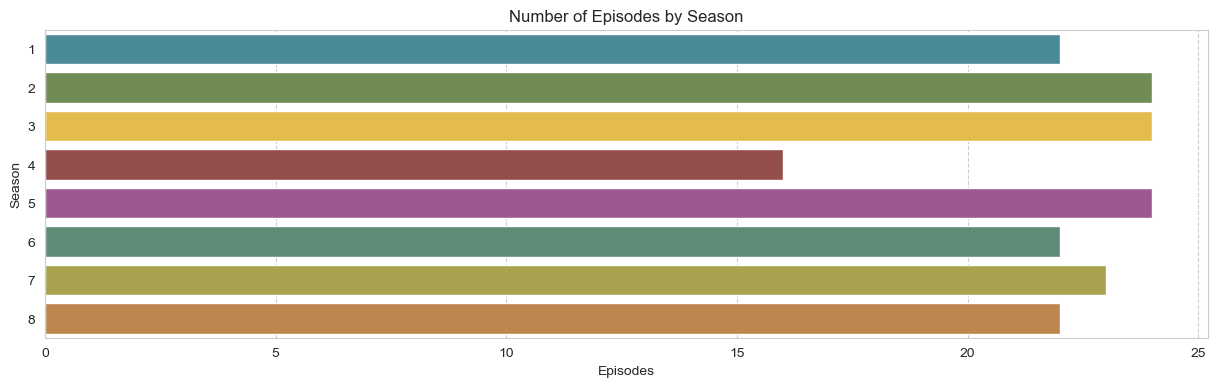

In [39]:
plt.figure(figsize=(15,4))
sns.barplot(df_rating, x="Episodes", y="Season", orient="h").set(title="Number of Episodes by Season")
plt.show()

Based on this bar plot, we can analyse the number of episodes for each season. It allows us to notice that in ovewhelming majority there are more than 20 episodes per season with only the 4th one not surpassing the threshold with 16 episodes. Afterwards we have three of those with 24 episodes, following the 7th with 23 and, finally, we have three more with 22 episodes.

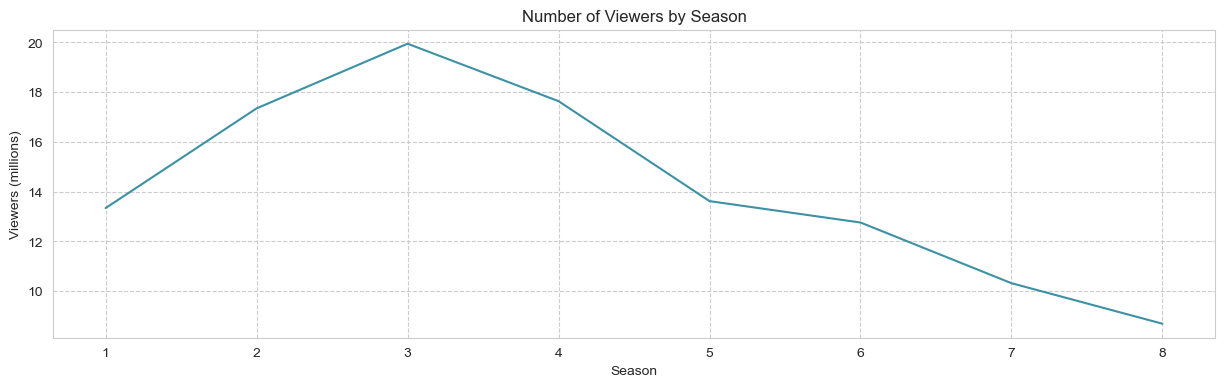

In [40]:
plt.figure(figsize=(15,4))
sns.lineplot(df_rating, y="Viewers (millions)", x="Season").set(title="Number of Viewers by Season")
plt.show()

Based on this line plot, we can view and analyse the number of viewers for each season. The series started strong with close to 14 million viewrs for the first season. The upward tendancy continued until the 3rd season, it being one with the highest number of viwers, 20 million. Unfortunately, after the 3rd season the tendancy went downwards. The 5th season reached the same number of viewrs as the 1st. The three last seasons continued dropping in viewers with the 8th, final, being the one with lowest numbers.

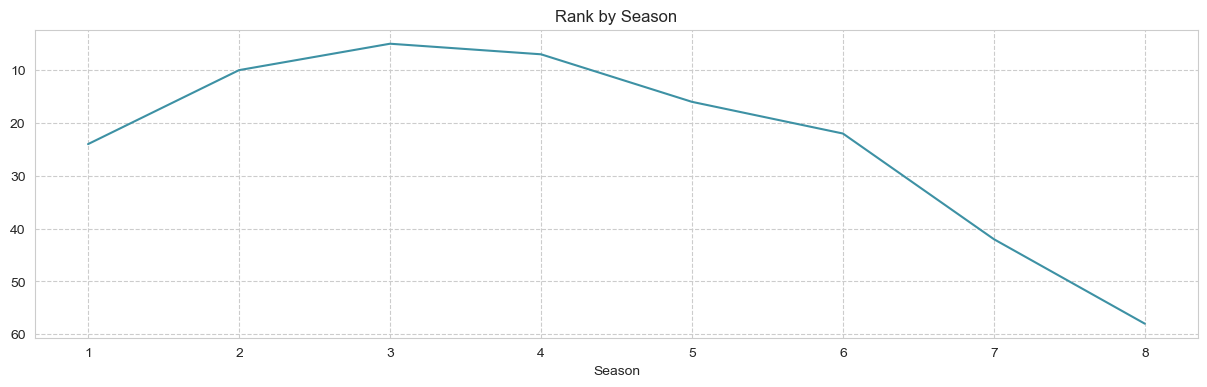

In [41]:
#reverse the plot
plt.figure(figsize=(15,4))
sns.lineplot(df_rating, y="Rank", x="Season").set(title="Rank by Season")
plt.gca().invert_yaxis()
plt.ylabel("")
plt.show()

Like with the number of viewers, we can observe the downwars tendancy of the series ranking. It was gaining popularity up until 3rd season, but after begain dropping. Firstly, steadily between 3rd and 6th seasons, although afterwards the drop came abrupt in the last two seasons.

In [42]:
df_rating["Duration"] = (df_rating["Season finale"] - df_rating["Season premiere"]).dt.days + 1

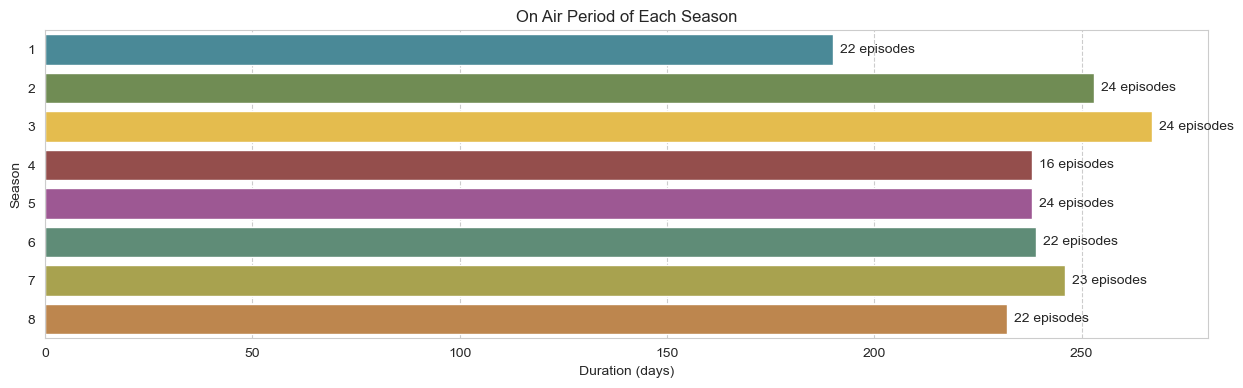

In [43]:
plt.figure(figsize=(15, 4))
bar_plot = sns.barplot(data=df_rating, y="Season", x="Duration", orient="h")
plt.title("On Air Period of Each Season")
plt.xlabel("Duration (days)")

for index, row in df_rating.iterrows():
    bar_plot.annotate(f'{row["Episodes"]} episodes',
                      xy=(row["Duration"], index),
                      xytext=(5, 0),
                      textcoords='offset points',
                      va='center',
                      ha='left')

plt.show()

On the bar plot we can observe the duration on air of each season in days. Although by observing the labels with the number of episodes that had been presented before, it can be concluded that rarely there is some correlation between the number of episodes and the days on air. For example, seasons 3, which includes the lowest number of episodes, 16, is shown to have been on air the same number of days as those that had 24 episodes. While the 1st season with 22 episodes was the shortest in terms of being on air.    
After an overview of the seasons data, we can continue with more specific data for each episode. 

## Directors

In [44]:
# firstly, we will look at the directors for each episode 
df["Directed by"].value_counts()

Directed by
Greg Yaitanes            30
Deran Sarafian           22
David Straiton           16
Dan Attias                8
Daniel Sackheim           7
Miguel Sapochnik          6
Katie Jacobs              5
David Platt               5
Juan J. Campanella        5
Sanford Bookstaver        5
Andrew Bernstein          5
Matt Shakman              5
Peter O'Fallon            4
David Semel               3
Lesli Linka Glatter       3
Fred Gerber               3
Martha Mitchell           2
Hugh Laurie               2
Tucker Gates              2
Tim Southam               2
Bryan Singer              2
David Shore               2
Jim Hayman                2
Newton Thomas Sigel       2
Bryan Spicer              2
Frederick King Keller     2
Félix Alcalá              1
Matthew Penn              1
Stefan Schwartz           1
Julian Higgins            1
Colin Bucksey             1
Kate Woods                1
S. J. Clarkson            1
Peter Medak               1
Guy Ferland               1
Nick Gom

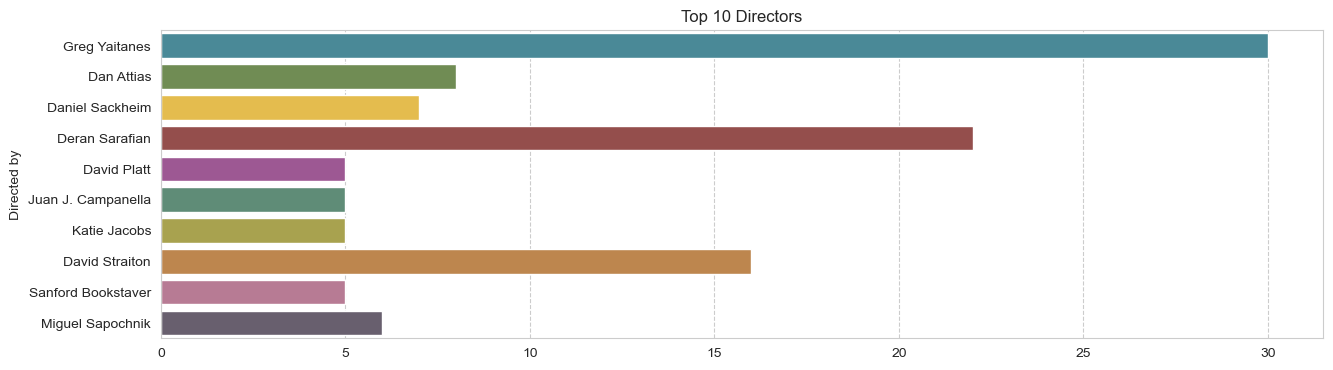

In [45]:
top_10_directors = df['Directed by'].value_counts().nlargest(10).index
df_top_10 = df[df['Directed by'].isin(top_10_directors)]

plt.figure(figsize=(15, 4))
sns.countplot(data=df_top_10, y="Directed by")
plt.title("Top 10 Directors")
plt.xlabel("")
plt.show()

In [46]:
df["Directed by"].value_counts().count()

50

Based on the data, we can conclude that there are some directors that shot a considerable number of episodes while there is a number of those that shot one or two episodes only. Overall there 50 directors have participated in the shooting thoughout 8 seasons.

<Figure size 1500x800 with 0 Axes>

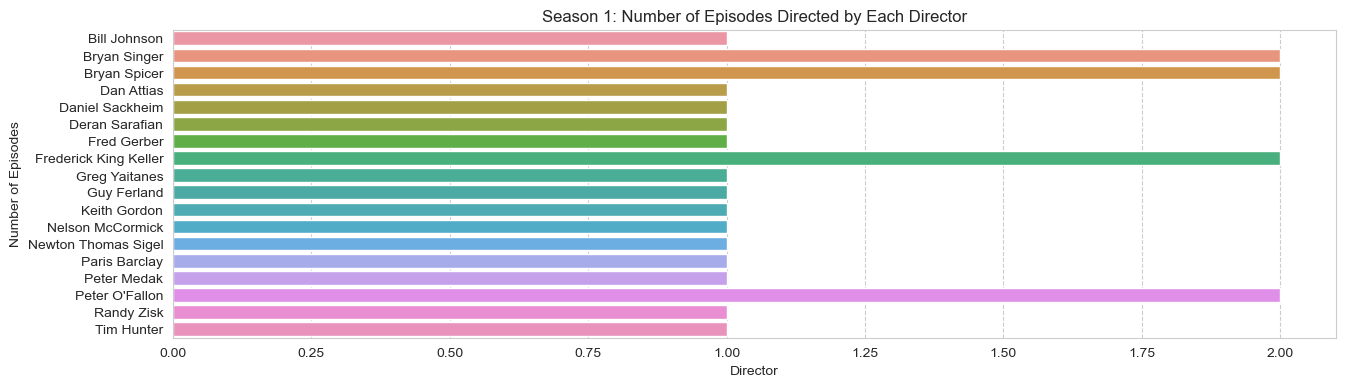

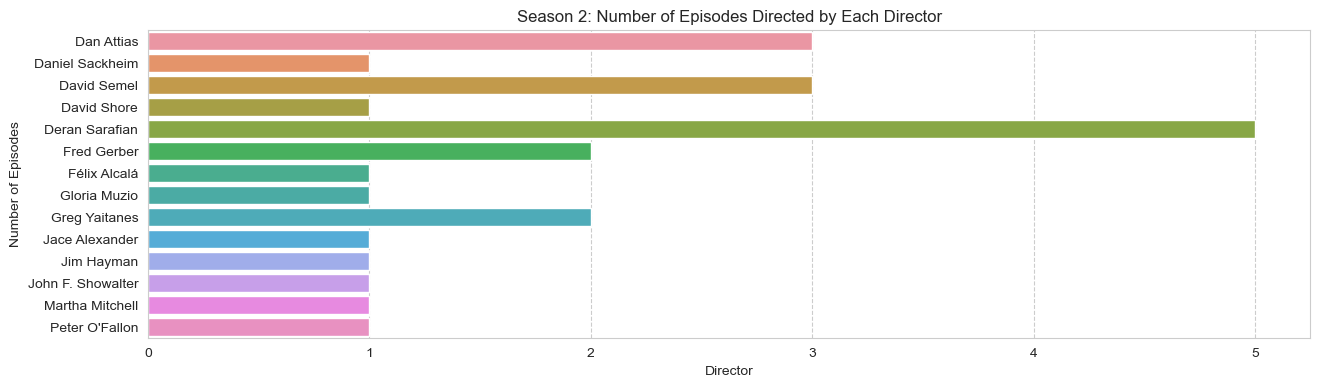

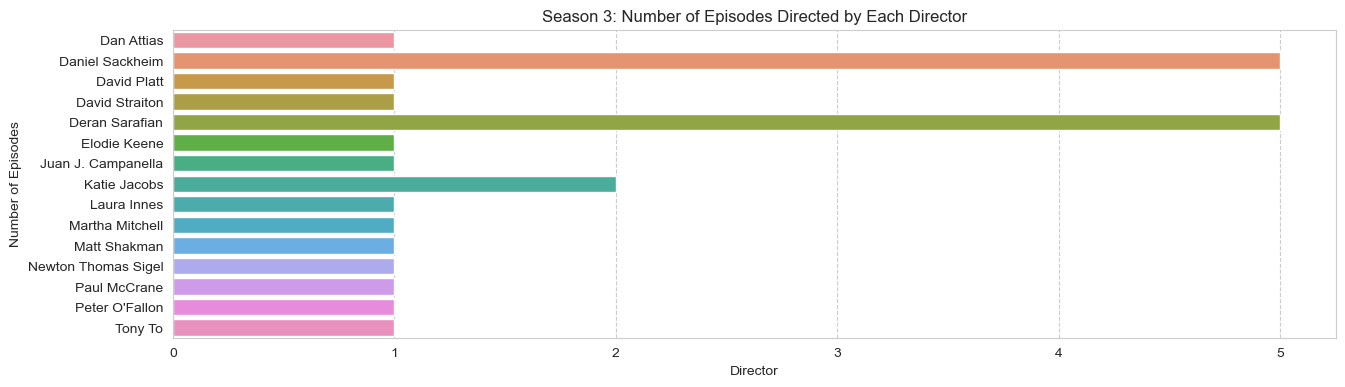

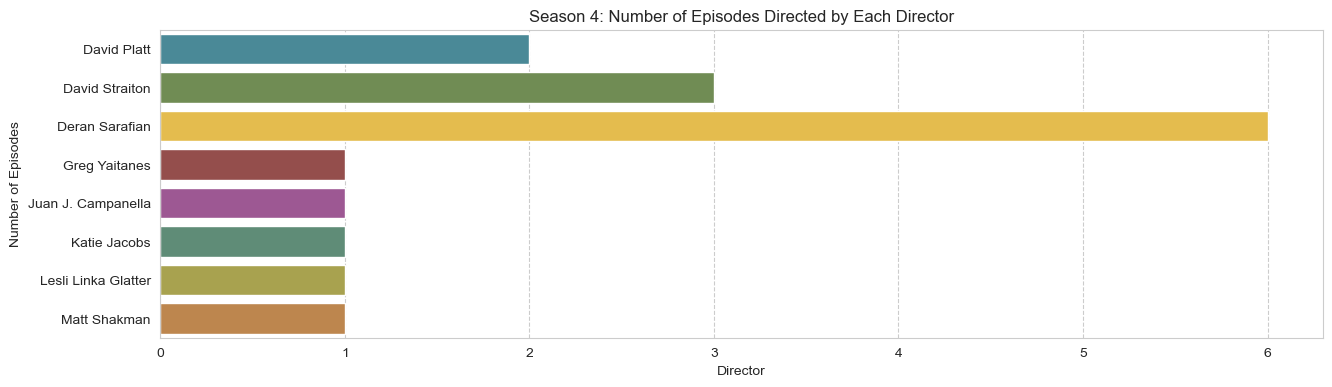

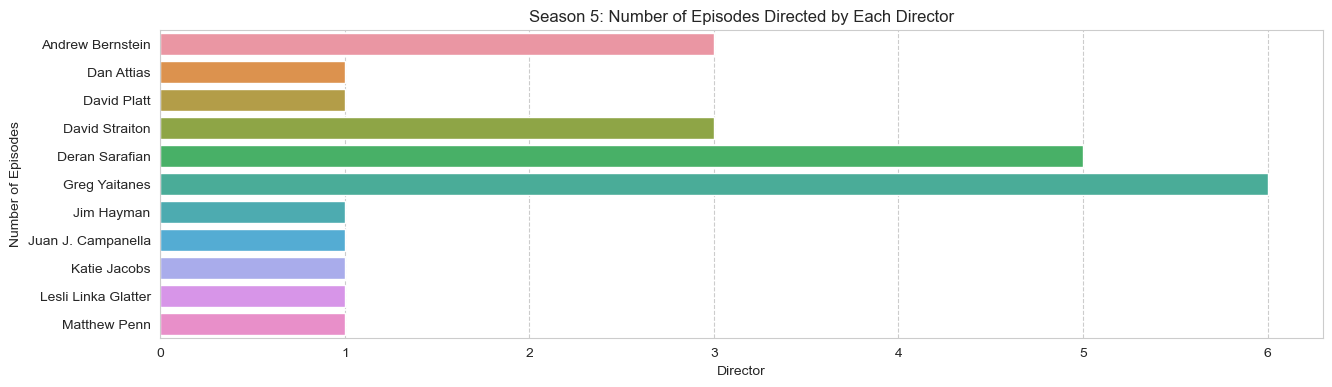

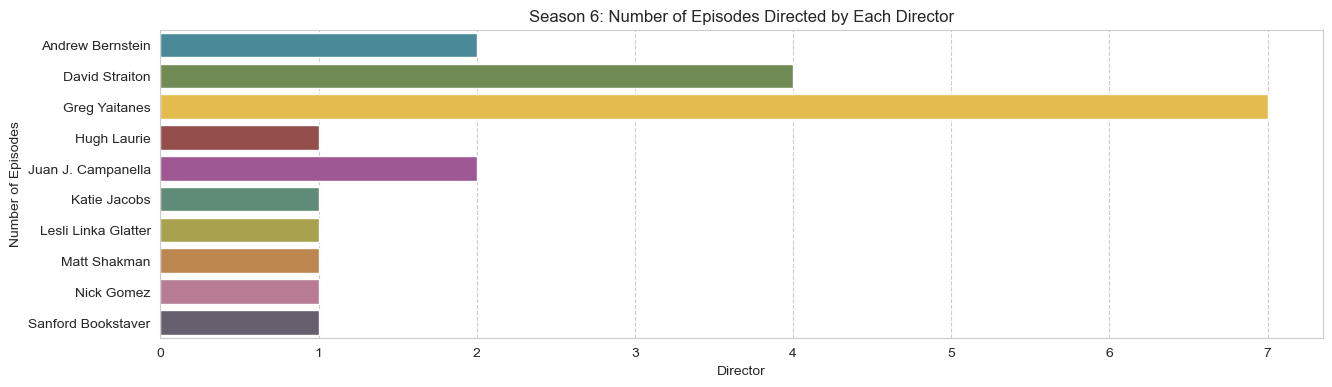

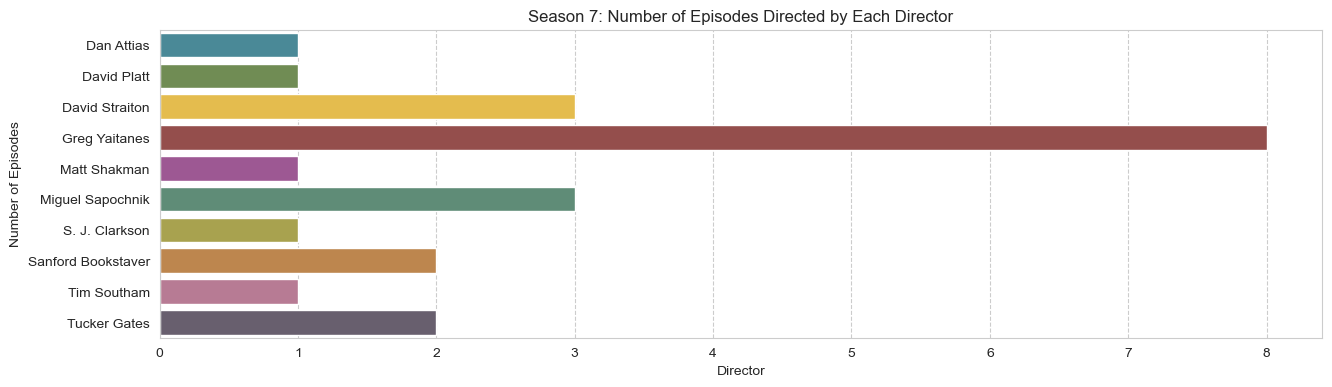

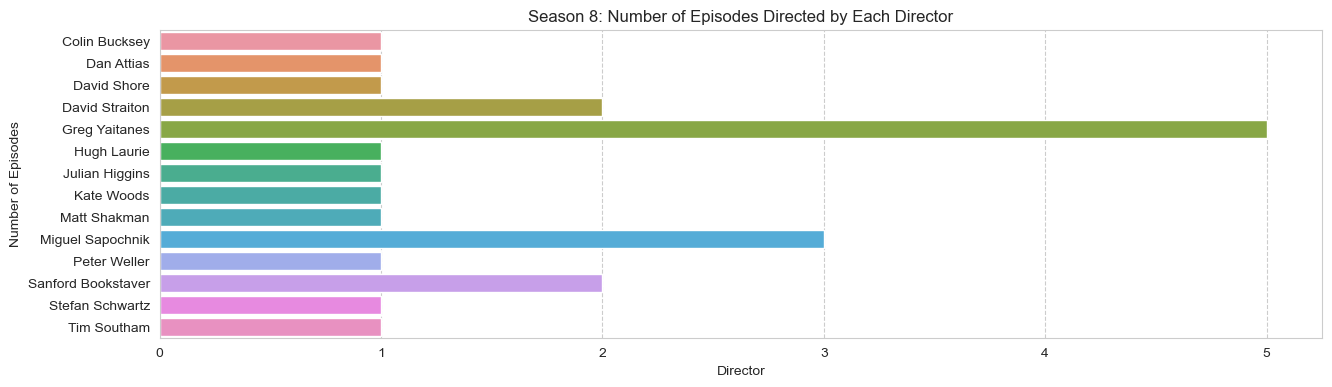

In [47]:
director_count = df.groupby(['Season', 'Directed by']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))

for season in df['Season'].unique():
    plt.figure(figsize=(15, 4))
    sns.barplot(data=director_count[director_count['Season'] == season], 
                y='Directed by', x='Count')
    plt.title(f'Season {season}: Number of Episodes Directed by Each Director')
    plt.xlabel('Director')
    plt.ylabel('Number of Episodes')
    plt.show()

Based on bar plots, we can observe the number of episodes directed by each director in every season. It seems like the first season was set to try different directors as it has the highest number of those. There is no directors that have shot more than 2 episodes in total. Seasons 2 to 5 show preference for the director named Deren Sarafian, while seasons 6 to 8 have been predominantly shot by the director named Greg Yaitanes.

## Written by

In [48]:
df["Written by"].value_counts()

Written by
Peter Blake                                                              12
Thomas L. Moran                                                          10
David Hoselton                                                            9
Lawrence Kaplow                                                           8
Doris Egan                                                                8
                                                                         ..
Carol Green & Dustin Paddock                                              1
Pamela Davis & Leonard Dick                                               1
Story by : Matthew V. LewisTeleplay by : Matthew V. Lewis & Eli Attie     1
Thomas L. Moran & Eli Attie                                               1
David Shore & Peter Blake & Eli Attie                                     1
Name: count, Length: 75, dtype: int64

In [49]:
df["Written by"].value_counts().count()

75

In [50]:
df["Written by"].value_counts().head(15)

Written by
Peter Blake                       12
Thomas L. Moran                   10
David Hoselton                     9
Lawrence Kaplow                    8
Doris Egan                         8
David Foster                       8
Sara Hess                          8
Liz Friedman                       7
John C. Kelley                     6
Russel Friend & Garrett Lerner     5
Eli Attie                          5
David Shore                        4
Matt Witten                        4
Pamela Davis                       4
Sara Hess & Liz Friedman           4
Name: count, dtype: int64

In the case of those that have written the script for the series, we get the total of 75 authors, although there are episodes that have various authors for the script.

## Seasons

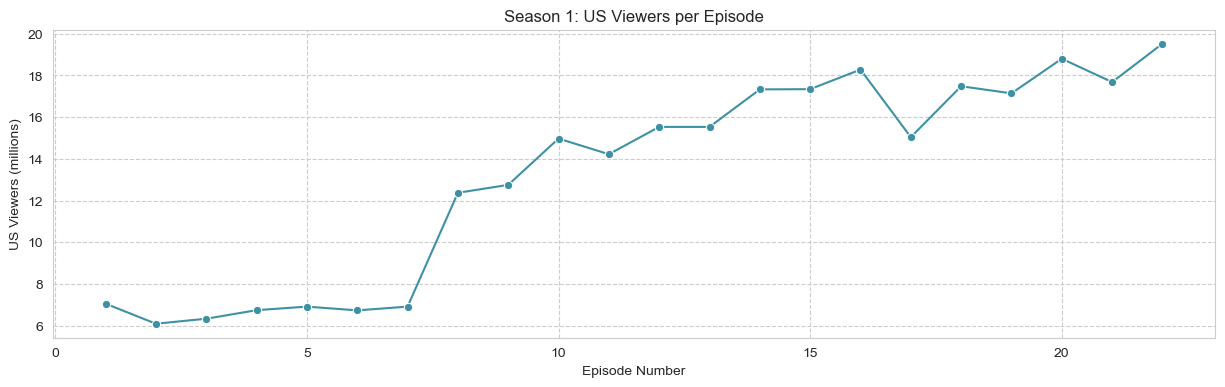

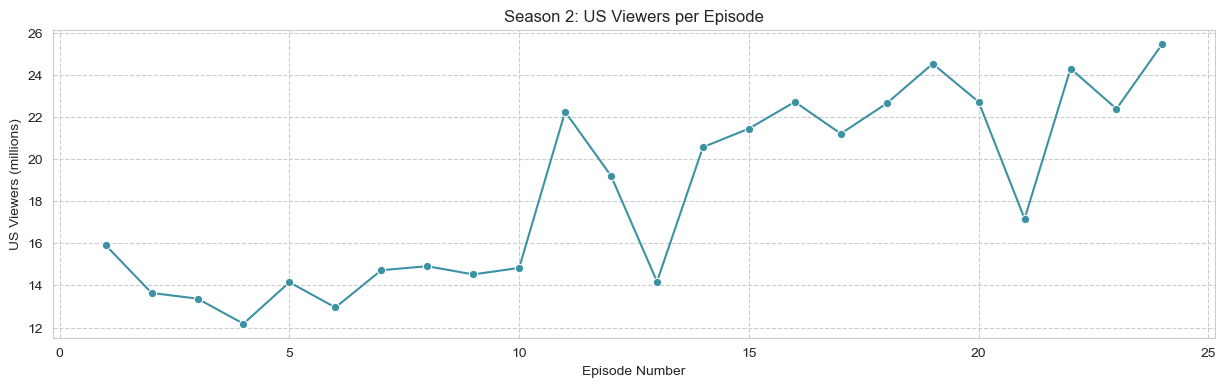

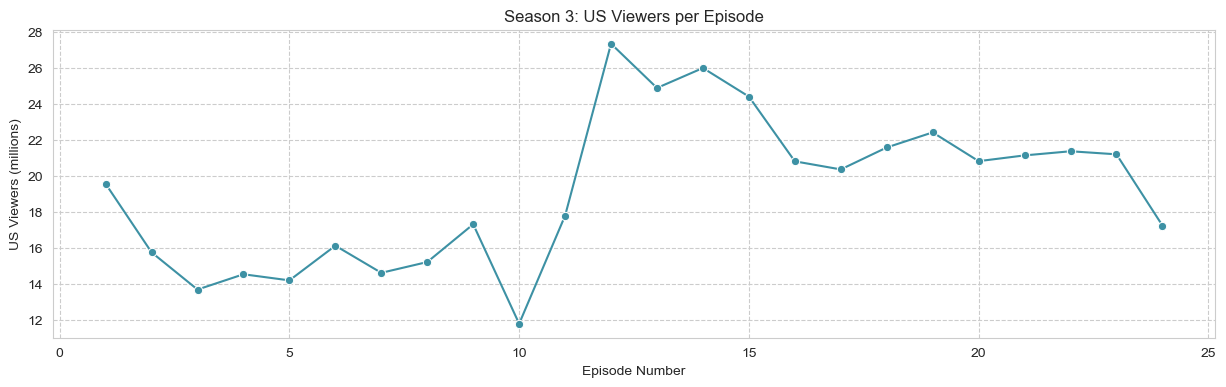

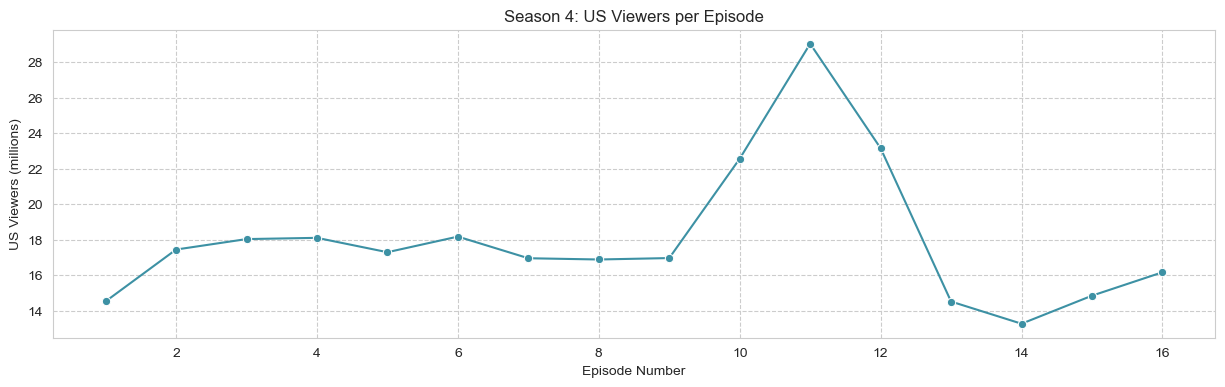

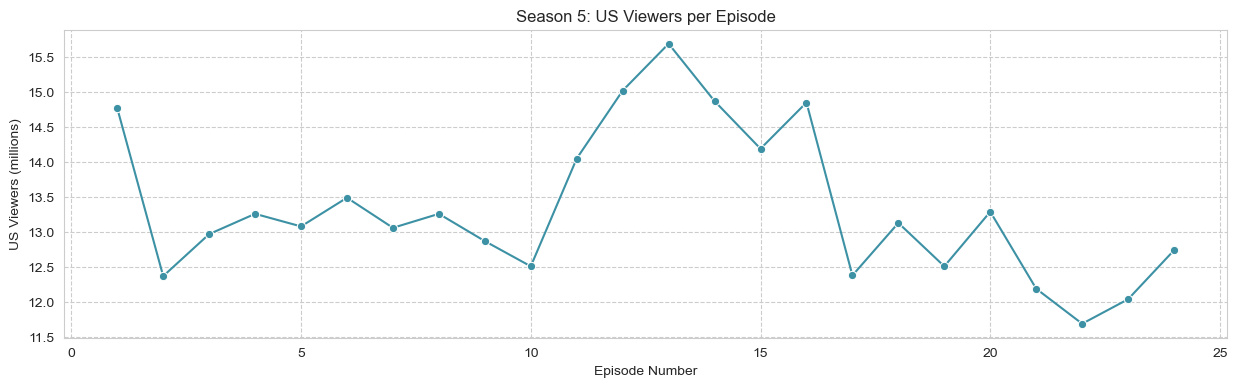

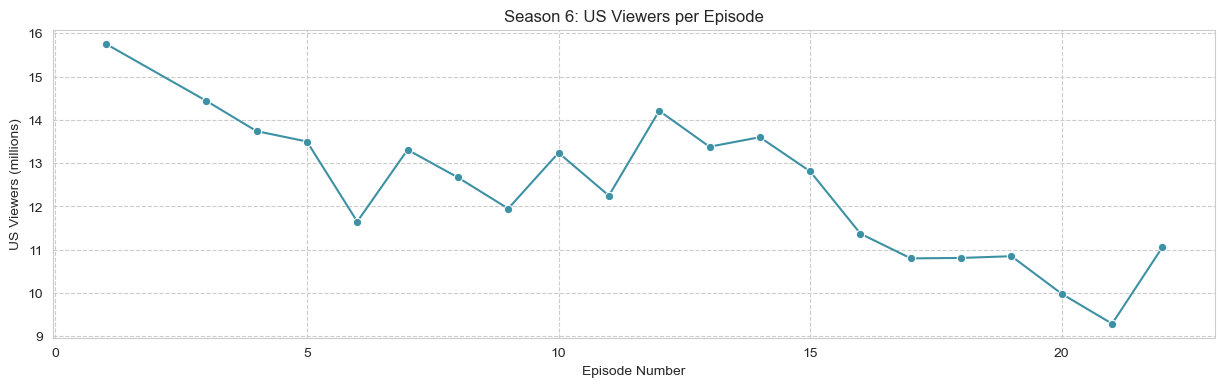

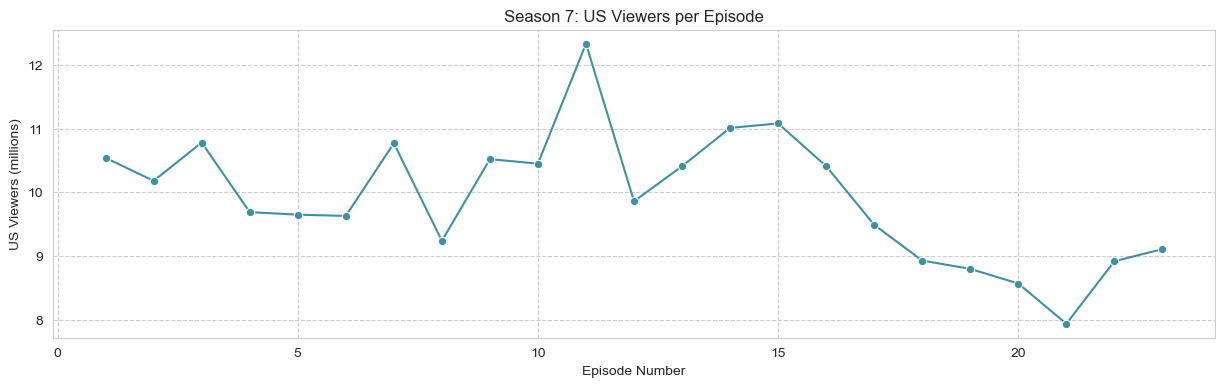

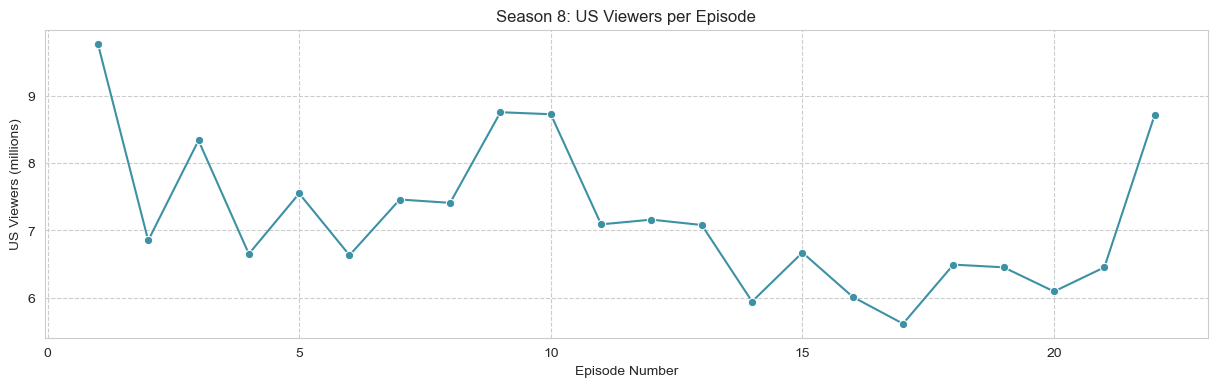

In [51]:
for season in df["Season"].unique():
    plt.figure(figsize=(15, 4))
    sns.lineplot(data=df[df["Season"] == season], 
                 x="No. in season", y="Us viewers (millions)", marker="o")
    plt.title(f"Season {season}: US Viewers per Episode")
    plt.xlabel("Episode Number")
    plt.ylabel("US Viewers (millions)")
    plt.show()

Based on peresented line plots, we can observe that the 1st season was the one that kicked off pretty strong with the number of viewers increasing constantly. The 2nd and the 3rd seasons are the ones that had the highest popularity by viewers as well as has been the most steady in terms those numbers. Throughout the season 4 we can observe generally lower numbers with peaking on episode 11. But from season 5 the numbers of views have significantly dropped in comparison with the first seasons. These can be characterized by separate peaks in popularity. 

In [52]:
# lets have a look what the episode 11 of season 4 was about and why it peaked so much in popularity
# as we might observe it's quite peculiar case that has gaines a lot of popularity
# surely a lot of fans of the series remember it particuclraly well
df[(df["Season"] == 4) & (df["No. in season"] == 11)]

,Season,No. overall,No. in season,Title,Directed by,Written by,Original air date,Us viewers (millions),Description,Final diagnosis
80,4,81,11,Frozen,David Straiton,Liz Friedman,2008-02-03,29.04,"When Dr. Cate Milton, a psychiatrist trapped in the South Pole and the research station's only doctor, becomes ill in the middle of her assignment, she and House are thrust into a long-distance relationship of sorts. Unable to get Cate out or any additional medical supplies to the South Pole station, House and his team must resort to treating her via webcam. Meanwhile, House sends Taub, Kutner and Thirteen to harass Cameron until she gets cable for his office and he attempts to discover the identity of Wilson's new girlfriend.",Fat embolism from unrepaired broken toe


# Lupus Problem

It's well-known to all series fans that House has been overzealous in suspecting lupus in all possible cases. We have been lucky enough to encounter script for all 8 seasons, so let's explore how often famous lupus has been mentioned.

In [53]:
# load the scripts

s_1 = pd.read_csv("./scripts/season1.csv", encoding="ISO-8859-1")
s_2 = pd.read_csv("./scripts/season2.csv", encoding="ISO-8859-1")
s_3 = pd.read_csv("./scripts/season3.csv", encoding="ISO-8859-1")
s_4 = pd.read_csv("./scripts/season4.csv", encoding="ISO-8859-1")
s_5 = pd.read_csv("./scripts/season5.csv", encoding="ISO-8859-1")
s_6 = pd.read_csv("./scripts/season6.csv", encoding="ISO-8859-1")
s_7 = pd.read_csv("./scripts/season7.csv", encoding="ISO-8859-1")
s_8 = pd.read_csv("./scripts/season8.csv", encoding="ISO-8859-1")

In [54]:
season_dataframes = [s_1, s_2, s_3, s_4, s_5, s_6, s_7, s_8]

In [55]:
# let's explore how many time lupus has been mentioned per season and per character
data_rows = []

for season_idx, season_df in enumerate(season_dataframes, start=1):    
    for _, row in season_df.iterrows():
        character = row["name"]
        lupus = 1 if pd.notna(row["line"]) and "lupus" in row["line"].lower() else 0
        
        data_rows.append({"Season": season_idx, "Character": character, "Lupus": lupus})

lupus_df = pd.DataFrame(data_rows)

In [56]:
lupus_df = lupus_df[lupus_df["Lupus"] != 0]
lupus_df.reset_index(drop=True, inplace=True)

In [57]:
lupus_df

,Season,Character,Lupus
0,1,Cameron,1
1,1,Chase,1
2,1,House,1
3,1,House,1
4,1,Cameron,1
...,...,...,...
110,8,House,1
111,8,Adams,1
112,8,House,1
113,8,Taub,1


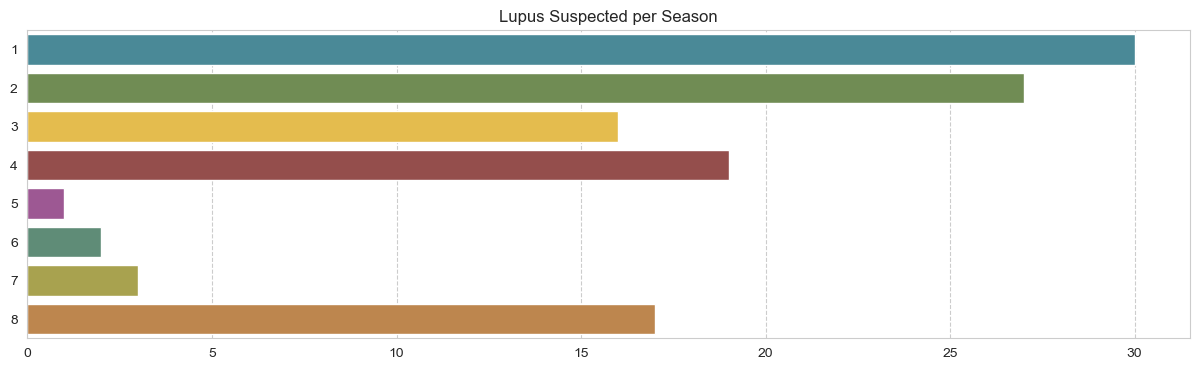

In [58]:
s_lupus = lupus_df.groupby("Season")["Lupus"].sum().reset_index()
plt.figure(figsize=(15, 4))
bar_plot = sns.barplot(s_lupus, y="Season", x="Lupus", orient="h")
plt.title("Lupus Suspected per Season")
plt.xlabel("")
plt.ylabel("")
plt.show()

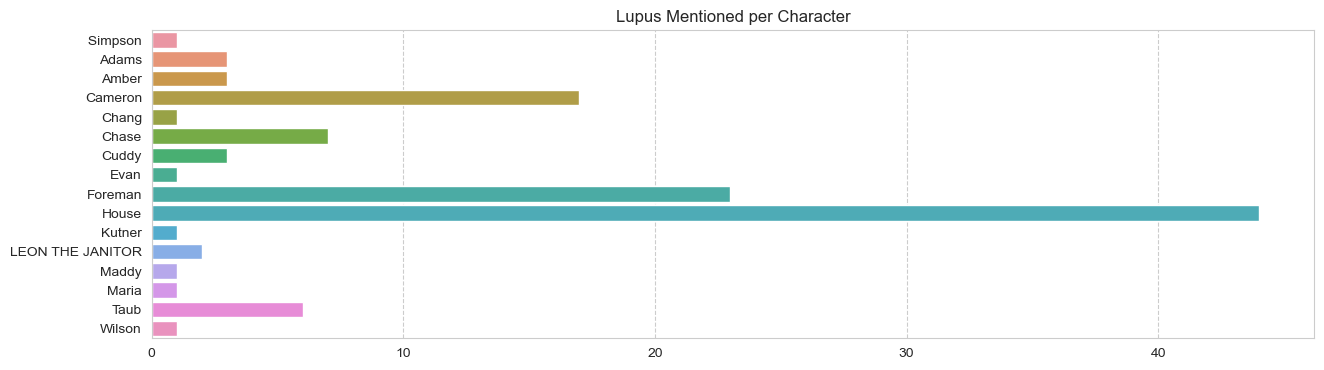

In [59]:
char_lupus = lupus_df.groupby("Character")["Lupus"].sum().reset_index()
plt.figure(figsize=(15, 4))
bar_plot = sns.barplot(char_lupus, y="Character", x="Lupus", orient="h")
plt.title("Lupus Mentioned per Character")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Lines Bonus

In [60]:
seasons_df = pd.concat([s_1, s_2, s_3, s_4, s_5, s_6, s_7, s_8], ignore_index=True)

In [61]:
lines = seasons_df["name"].value_counts().head(15)
lines_df = pd.DataFrame({
    "Character": lines.index,
    "Lines": lines.values
})

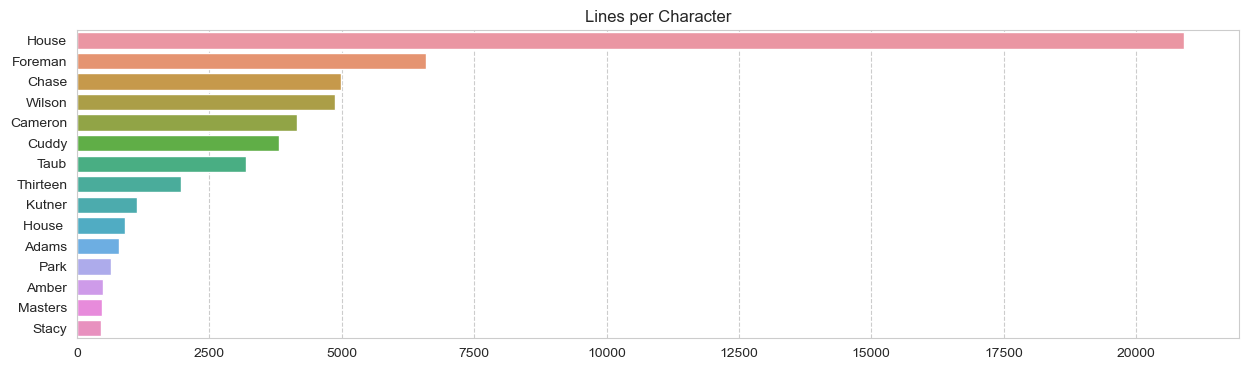

In [62]:
plt.figure(figsize=(15, 4))
bar_plot = sns.barplot(lines_df, y="Character", x="Lines", orient="h")
plt.title("Lines per Character")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [63]:
lines_df

,Character,Lines
0,House,20908
1,Foreman,6590
2,Chase,4989
3,Wilson,4874
4,Cameron,4150
5,Cuddy,3817
6,Taub,3197
7,Thirteen,1971
8,Kutner,1136
9,House,915


In [64]:
# let's add this valuable information to other dataframes so we can use them in the fututre
df_rating = pd.merge(df_rating, s_lupus, on="Season")

merge = pd.DataFrame({
    "Name": ["Dr. Gregory House", "Dr. James Wilson", "Dr. Eric Foreman", "Dr. Robert Chase", "Dr. Lisa Cuddy", "Dr. Allison Cameron",
            "Dr. Chris Taub", 'Dr. Remy "Thirteen" Hadley', "Dr. Lawrence Kutner", "Dr. Martha Masters", "Dr. Chi Park", "Dr. Jessica Adams"],
    "Lupus": [44, 1, 23, 7, 3, 17, 6, 0, 1, 0, 0, 0],
    "Lines": [20908, 4874, 6590, 4989, 3817, 4150, 3197, 1971, 1136, 471, 647, 799]
})
df_cast = pd.merge(df_cast, merge, on="Name")

# Idiot Bonus

It's well-known that House is quite eccentric, so let's check how many times he has called people idiots for the final touch.

In [65]:
idiot = []
for season_idx, season_df in enumerate(season_dataframes, start=1):    
    for _, row in season_df.iterrows():
        character = row["name"]
        line = row["line"]
        
        idiot_mention = 1 if pd.notna(line) and "idiot" in line.lower() and character == "House" else 0
        idiot.append({"Season": season_idx, "Character": character, "Idiot": idiot_mention})

mentions_df = pd.DataFrame(idiot)
house_mentions = mentions_df[mentions_df["Character"] == "House"]
idiot_count = house_mentions.groupby("Season")["Idiot"].sum().reset_index()

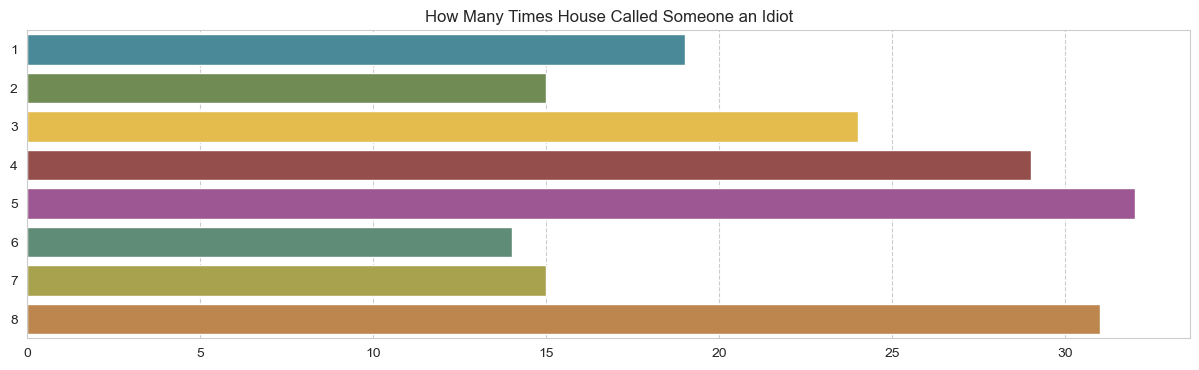

In [66]:
plt.figure(figsize=(15, 4))
bar_plot = sns.barplot(idiot_count, y="Season", x="Idiot", orient="h")
plt.title("How Many Times House Called Someone an Idiot")
plt.xlabel("")
plt.ylabel("")
plt.show()